# Regular Genomics Project **RNA Localisation**


In [15]:
from plotting import plot_line_graph, multiplot_pearson
from metrics import Pearson
from models import CNN
from utils import prepare_data, set_variables
import matplotlib.pyplot as plt

### **1.** Data Preparation

Firstly, we import several necessary packages and load in our data:

In [16]:
train_data, valid_data, test_data = prepare_data()

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [17]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = 'flor_CNN_Att8'
model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_model, params_train = set_variables(model_name, max_seq_len)

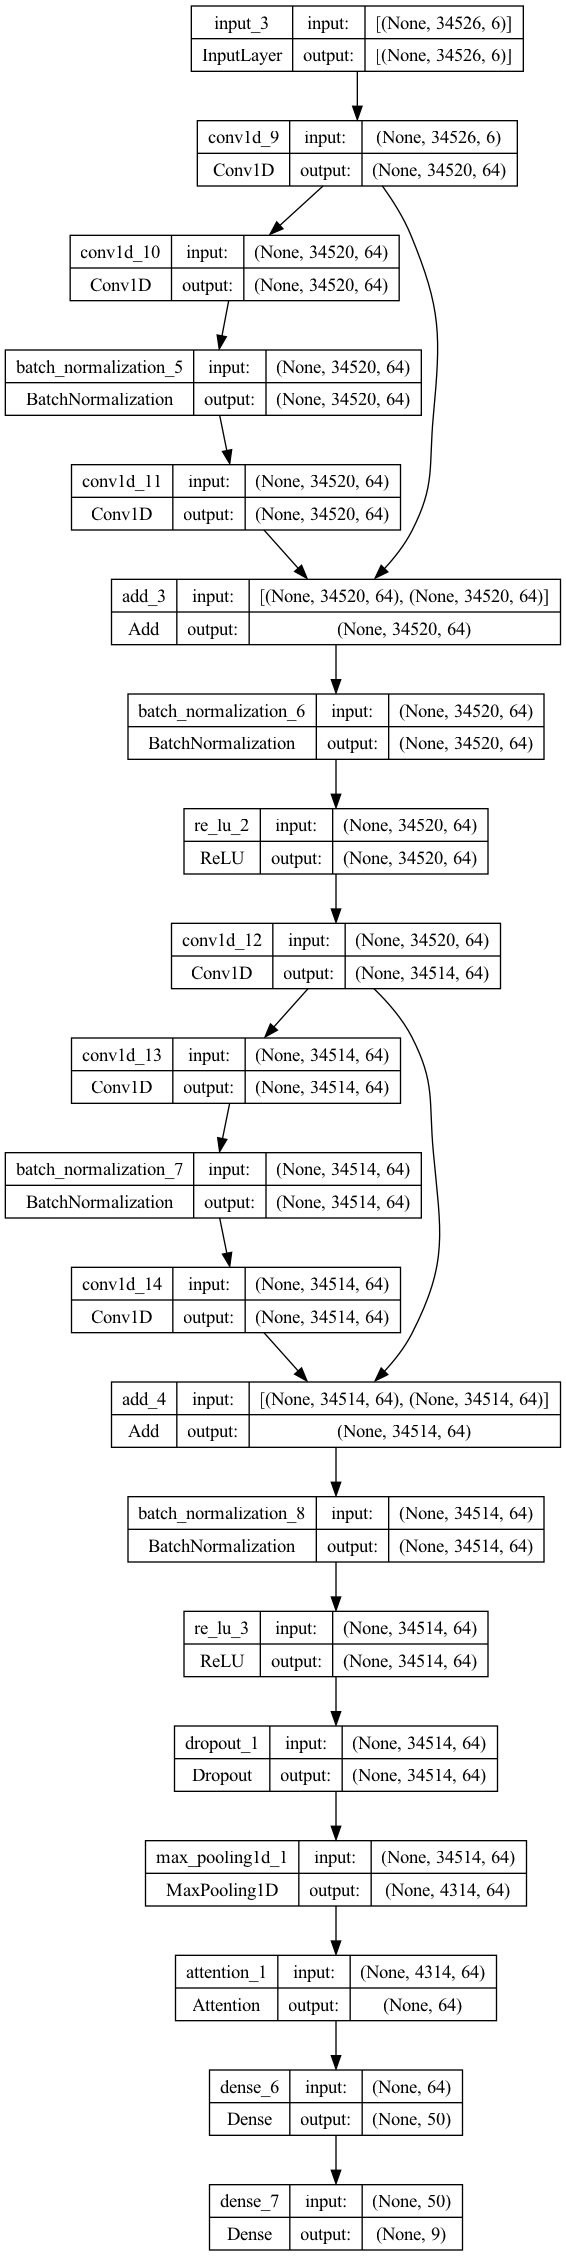

In [18]:
model = CNN(input_size=(max_seq_len, 6),
            params_model=params_model,
            metrics=[Pearson(return_dict=True)]
            )

model.print_model()
# model.summary() #if information about number of params needed

In [19]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 34526, 6)]           0         []                            
                                                                                                  
 conv1d_9 (Conv1D)           (None, 34520, 64)            2688      ['input_3[0][0]']             
                                                                                                  
 conv1d_10 (Conv1D)          (None, 34520, 64)            45120     ['conv1d_9[0][0]']            
                                                                                                  
 batch_normalization_5 (Bat  (None, 34520, 64)            256       ['conv1d_10[0][0]']           
 chNormalization)                                                                           

In [20]:
history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data,
                                 params_train_dataLoader=params_dataLoader_train,
                                 params_eval_dataLoader=params_dataLoader_valid,
                                 params_train=params_train)

Epoch 1/20
311/311 [==============================] - 1589s 5s/step - loss: 201.4472 - ERM: -0.0346 - KDEL: -7.2898e-04 - LMA: 0.0028 - MITO: -0.0102 - NES: 0.0052 - NIK: 0.0072 - NLS: -0.0341 - NUCP: 0.0204 - OMM: -0.0326 - val_loss: 166.9557 - val_ERM: -4.7482e-06 - val_KDEL: 4.6701e-04 - val_LMA: 1.1534e-08 - val_MITO: 1.2014e-05 - val_NES: -1.2499e-07 - val_NIK: -0.1966 - val_NLS: 1.5739e-08 - val_NUCP: -0.2231 - val_OMM: -1.4911e-04
Epoch 2/20
311/311 [==============================] - 1593s 5s/step - loss: 76.4740 - ERM: -0.0050 - KDEL: 0.0174 - LMA: 0.0235 - MITO: 0.0118 - NES: 0.0038 - NIK: 0.0102 - NLS: -0.0146 - NUCP: 0.0077 - OMM: -0.0297 - val_loss: 65.5436 - val_ERM: 0.4125 - val_KDEL: 0.0069 - val_LMA: 0.2552 - val_MITO: 0.0393 - val_NES: -0.1977 - val_NIK: 0.2387 - val_NLS: 1.8498e-06 - val_NUCP: 0.0223 - val_OMM: -0.0139
Epoch 3/20
311/311 [==============================] - 1637s 5s/step - loss: 62.9515 - ERM: -0.0097 - KDEL: 0.0256 - LMA: 0.0274 - MITO: 0.0180 - NES: 0

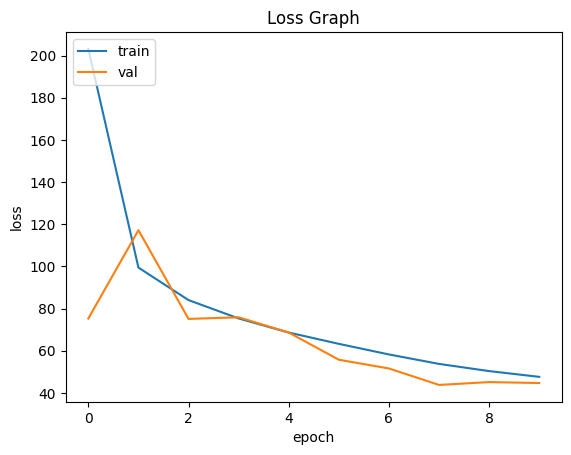

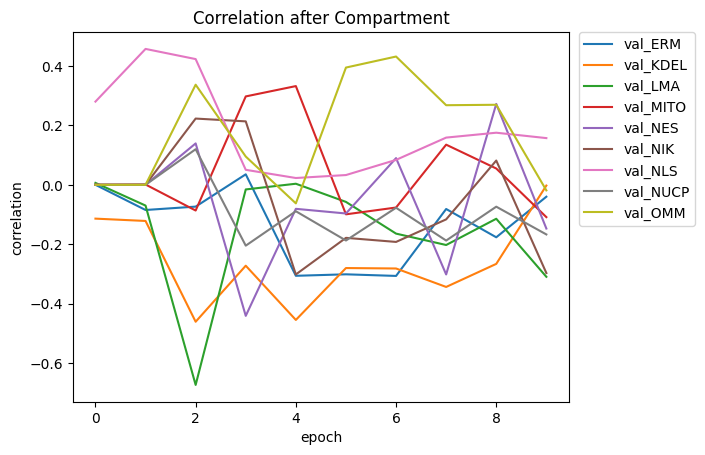

In [ ]:
plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

multiplot_pearson(history.history)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

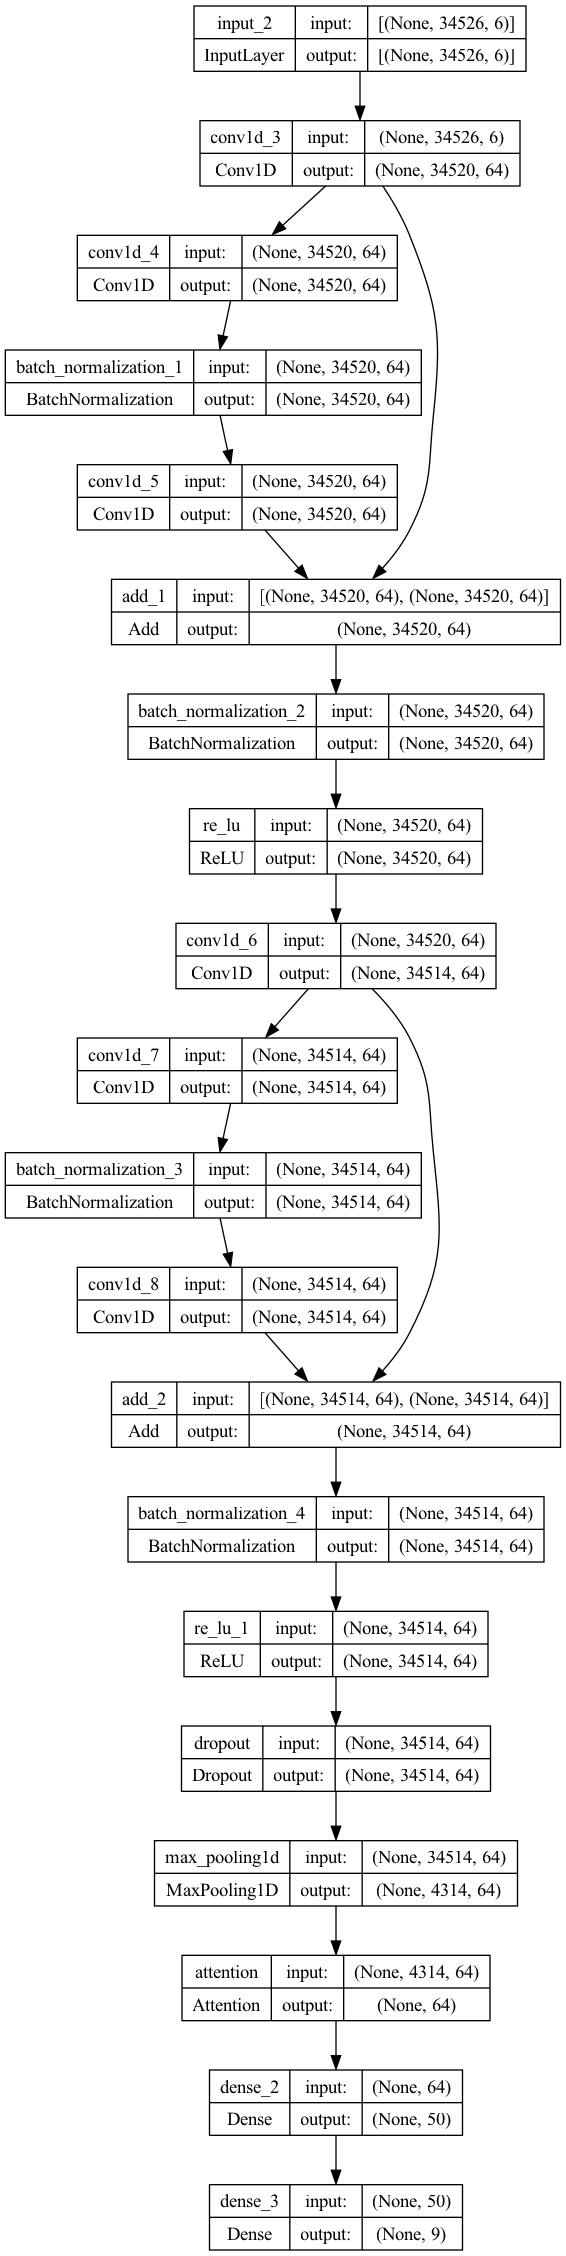

In [ ]:
model.print_model(model_architecture_path)
#model.save_model(model_output_path)